# imports

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

from tensorflow.keras.models import load_model

# constants

In [6]:
TEST_CSV = '../data/traffic_data_old/Test.csv'
TEST_DATA_PATH = '../data/traffic_data_old'
TEST_IMGS_PATH = '../data/../data/test_imgs/test_img.jpg'


MODEL_PATH_1 = '../data/traffic_data_model_4k_imgs_25_epoch.h5'
MODEL_PATH_2 = '../data/traffic_data_model_8k_imgs_25_epoch.h5'
MODEL_PATH_3 = '../data/traffic_data_model_with_bg.h5'
model = load_model(MODEL_PATH_3)

# load testing data

CPU times: user 1.92 s, sys: 367 ms, total: 2.29 s
Wall time: 3.76 s


In [18]:
def test(test_no):
    test_no = test_no - 1
    IMG_RES = 300

    pred = model.predict(test_data[test_no:test_no+1])
    box_coodinates = pred[0][0]
    label = np.where(pred[1][0] == max(pred[1][0]))[0]

    img_ = Image.open(TEST_DATA_PATH + '/' + test_filenames[test_no])
    img_ = img_.resize((IMG_RES, IMG_RES))
    img_ = np.array(img_)

    x1_ = int(box_coodinates[0] * IMG_RES)
    y1_ = int(box_coodinates[1] * IMG_RES)
    x2_ = int(box_coodinates[2] * IMG_RES)
    y2_ = int(box_coodinates[3] * IMG_RES)

    cv2.rectangle(img_, pt1=(x1_, y1_), pt2=(x2_, y2_), color=(255, 0, 0), thickness=1)

    plt.figure()
    plt.title(f"Predicted Class{label[0]}", fontdict={'fontsize': 'x-large', 'color': 'red', 'fontweight': 'heavy'})
    plt.xlabel(f"Actual Class{test_classIds[test_no]}", fontdict={'fontsize': 'x-large', 'color': 'red', 'fontweight': 'heavy'})
    plt.imshow(img_)
    plt.show()


1/1 [==============================] - 1s 601ms/step


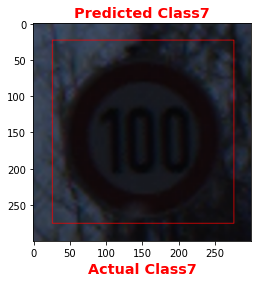

1/1 [==============================] - 0s 350ms/step


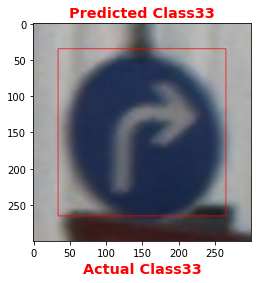

1/1 [==============================] - 0s 351ms/step


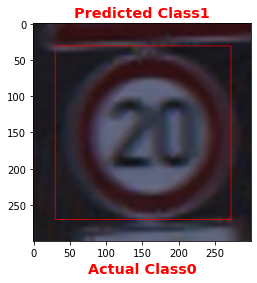

1/1 [==============================] - 0s 321ms/step


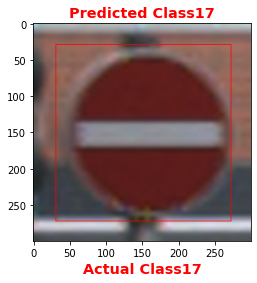

1/1 [==============================] - 0s 324ms/step


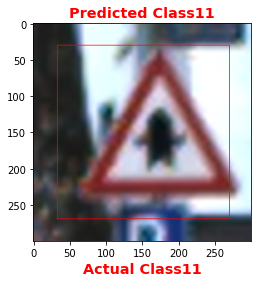

1/1 [==============================] - 1s 530ms/step


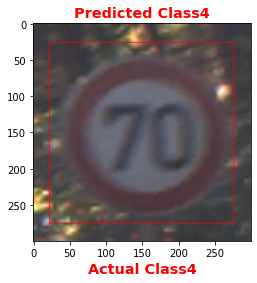

1/1 [==============================] - 0s 477ms/step


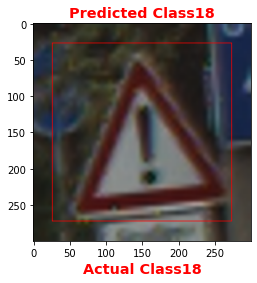

1/1 [==============================] - 0s 413ms/step


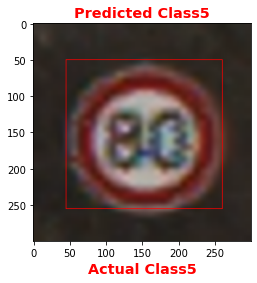

1/1 [==============================] - 0s 420ms/step


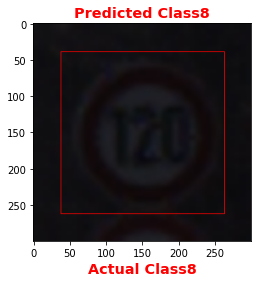

In [19]:
for i in range(1, 10):
    test(i)